# `1.` 패키지 임포트



In [1]:
from scipy.stats import chisquare
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# `2.` 데이터 로드

In [2]:
# 시트 순서 (전체 관광지[0]), (제주시, 추자면[1]), (초전읍, 구좌읍, 우도[2]), (한경면, 한림읍, 애월읍[3]), (서귀포시 남원읍[4]), (성산읍, 표선면[5]), (안덕면, 대정읍[6]) (테스트[7])
train_data = pd.read_excel('/content/drive/MyDrive/Project/여행 코스 추천/data/학습용 데이터/tourist_data_learning.xlsx', sheet_name=0)

# `3.` 데이터 확인

In [3]:
display(train_data)
print(train_data.info())

,Unnamed: 0,관광 명소,주소,역사,자연,사진,도보,예술,육상,수상,...,사계절,어린이,청년,중년,노년,혼자,친구,커플,부모,가족
0,0.0,우도,제주특별자치도 제주시 우도면 삼양고수물길 1,0.0,2.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,성산일출봉,제주특별자치도 서귀포시 성산읍 일출로 284-12,0.0,3.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,2.0,사려니숲길,제주특별자치도 제주시 조천읍 교래리 산 137-1,0.0,3.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,3.0,카멜리아힐,제주 서귀포시 안덕면 병악로 166,0.0,2.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,4.0,협재해수욕장,제주특별자치도 제주시 한림읍 한림로 329-10,0.0,3.0,0.0,0.0,0.0,1.0,4.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1091,1091.0,효명사,제주특별자치도 서귀포시 남원읍 516로 815-41,1.0,1.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1092,1092.0,후포해변,제주특별자치도 제주시 추자면 대서5길 87,0.0,2.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1093,1093.0,훈데르트바서파크,제주특별자치도 제주시 우도면 우도해안길 32-12,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1094,1094.0,휘닉스 르쏠레이테라피,제주특별자치도 서귀포시 성산읍 섭지코지로 107 휘닉스제주아일랜드리조트 블루동 1층,0.0,0.0,0.0,0.0,0.0,2.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1096 entries, 0 to 1095
Data columns (total 25 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  1096 non-null   float64
 1   관광 명소       1095 non-null   object 
 2   주소          1088 non-null   object 
 3   역사          1096 non-null   float64
 4   자연          1096 non-null   float64
 5   사진          1096 non-null   float64
 6   도보          1096 non-null   float64
 7   예술          1096 non-null   float64
 8   육상          1096 non-null   float64
 9   수상          1096 non-null   float64
 10  공중          1096 non-null   float64
 11  봄           1096 non-null   float64
 12  여름          1096 non-null   float64
 13  가을          1096 non-null   float64
 14  겨울          1096 non-null   float64
 15  사계절         1096 non-null   float64
 16  어린이         1096 non-null   float64
 17  청년          1096 non-null   float64
 18  중년          1096 non-null   float64
 19  노년          1096 non-null  

# `4.` ALS 구축 및 학습 [row version]

## `4-1.` 학습 파라미터 초기화

In [4]:
# 학습 파라미터를 초기화 합니다. 초기값은 논문에서 가장 좋은 성능을 낸다는 값으로 설정합니다.
r_lambda = 40 # 데이터 정규화에 필요한 변수입니다.
nf = 200      # Matrix Factorization 학습 시에 정하는 임의의 차원 수이며 보통 50에서 200 사이로 설정합니다.
alpha = 40    # Confidence level(신뢰도)을 조정할때 쓰일 변수입니다.  

## `4-2.`학습용 데이터 생성

In [5]:
# 학습시킬 태그 데이터 행렬을 생성합니다. 행(row)은 관광지 수, 열(column)은 태그의 개수가 됩니다.
R = train_data.iloc[:, 3:].values               # train_data의 모든 행의 4번째 열부터 마지막 열의 원소 값만 추출하여 R 변수에 저장합니다.
print('R.shape: {}'.format(R.shape))            # R 변수의 크기를 출력합니다.
print('-----R-----\n{}\n-----------'.format(R)) # R 변수의 입력값의 모양을 확인합니다.
print('R type: {}'.format(type(R)))             # R 변수의 타입을 확인합니다.

R.shape: (1096, 22)
-----R-----
[[0. 2. 1. ... 0. 0. 0.]
 [0. 3. 1. ... 0. 1. 0.]
 [0. 3. 0. ... 1. 0. 0.]
 ...
 [1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 1. 1. 0.]]
-----------
R type: <class 'numpy.ndarray'>


## `4-3.` 관광지 수와 태그 수의 Latent Factor Matrix 초기화

In [6]:
# 아주 작은 랜덤 한 값들로 행렬의 값을 초기화시킵니다.
nu = R.shape[0] # 관광지의 개수
ni = R.shape[1] # 태그의 개수

# 행렬을 확인합니다.
print('nu: {}'.format(nu))
print('ni: {}'.format(ni))
print('-'*100)

# 행렬의 값을 아주 작은 값으로 초기화합니다.(rand: 0 ~ 1사이의 표준정규분포 난수 매트릭스를 생성합니다.)
X = np.random.rand(nu, nf) * 0.01 # 관광지 수 매트릭스
Y = np.random.rand(ni, nf) * 0.01 # 태그 수 매트릭스

# 초기화된 매트릭스를 확인합니다.
print(X)
print('-'*100)
print(Y)

nu: 1096
ni: 22
----------------------------------------------------------------------------------------------------
[[0.00855287 0.00960142 0.00110373 ... 0.00818761 0.00736823 0.00445072]
 [0.00780137 0.00571401 0.00374823 ... 0.00130279 0.00394875 0.00909948]
 [0.00727399 0.0062529  0.00491698 ... 0.00252021 0.00121951 0.0020621 ]
 ...
 [0.00296263 0.00163079 0.00498306 ... 0.00288991 0.00728484 0.00352084]
 [0.00415882 0.00539922 0.00464091 ... 0.00710362 0.00737585 0.00135974]
 [0.00398662 0.00925207 0.00792014 ... 0.00419347 0.00032613 0.00129123]]
----------------------------------------------------------------------------------------------------
[[8.45406435e-03 2.68661660e-03 3.21376713e-03 ... 9.68761272e-03
  5.98151441e-04 6.44994764e-03]
 [3.57832756e-03 3.89403876e-03 9.47593956e-03 ... 1.35974360e-03
  8.41444910e-03 4.74102233e-03]
 [1.14912705e-03 7.83199139e-03 2.92153854e-03 ... 3.20100386e-04
  4.99564497e-03 8.41176119e-03]
 ...
 [3.51528455e-04 2.07690532e-03 4.90

## `4-4.` 선호도 설정 P

In [7]:
# 주어진 학습용 태그 테이블을 0과 1로 된 binary rating matrix P로 바꾸어줍니다.
P = np.copy(R) # R 사본을 생성합니다.
P[P > 0] = 1   # 0보다 큰 값을 1로 치환하여 P 변수에 대입합니다.
print(P)

[[0. 1. 1. ... 0. 0. 0.]
 [0. 1. 1. ... 0. 1. 0.]
 [0. 1. 0. ... 1. 0. 0.]
 ...
 [1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 1. 1. 0.]]


## `4-5.` 신뢰도 설정 C

In [8]:
# 학습용 태그 테이블에 Confidence level을 적용한 C 행렬을 구합니다.
C = 1 + alpha * R # 1 + (40 * R)
print(C)
print('-'*100) 
print('C.shape: {}'.format(C.shape))

[[  1.  81.  41. ...   1.   1.   1.]
 [  1. 121.  41. ...   1.  41.   1.]
 [  1. 121.   1. ...  41.   1.   1.]
 ...
 [ 41.   1.   1. ...   1.   1.   1.]
 [  1.   1.   1. ...   1.   1.   1.]
 [  1.  41.   1. ...  41.  41.   1.]]
----------------------------------------------------------------------------------------------------
C.shape: (1096, 22)


## `4-6.` Loss Function 구현
- C: 신뢰도 행렬(confidence matrix)
- P: 이항 정격 행렬(binary rating matrix)
- X: 관광지 수 행렬(tourist latent matrix)
- Y: 태그 수 행렬(tag latente matrix)
- r_lambda: 정규화 조절 값(regularization lambda)
- xTy: 예측 행렬(predicted matrix)
- total_loss = (confidence_level * predict_loss) + regularization_loss
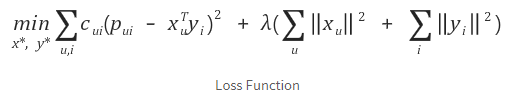

In [9]:
def loss_function(C, P, xTy, X, Y, r_lambda) :
  predict_error = np.square(R - xTy)                                         # R의 행렬 요소에 xTy행렬 요소를 각각 빼고 모든 요소를 제곱하여 predict_error 변수에 저장합니다.
  confidence_error = np.sum(C * predict_error)                               # C의 행렬 배열과 predict_error의 행렬 배열을 모두 합하여 confidence_error 변수에 저장합니다.
  regularzation = r_lambda * ((np.sum(np.square(X))) + np.sum(np.square(Y))) # X와 Y의 행렬 배열의 각 요소에 제곱을 한 뒤 모든 요소를 합하고 r_lambda(40)을 곱한 뒤 regularzation 변수에 저장합니다.
  total_loss = confidence_error + regularzation                              # confidence_error와 regularzation을 합하여 total_loss 변수에 저장합니다.
  return np.sum(predict_error), confidence_error, regularzation, total_loss

## `4-7.` Optimizer 설정
- X[u] = (yTCuy + lambda*I)^-1yTCuy
- Y[i] = (xTCix + lambda*I)^-1xTCix

In [10]:
# 로스 펑션을 최적화 시키는 Optimizer를 작성합니다.
def optimize_tourist(X, Y, C, P, nu, nf, r_lambda) :
  yT = np.transpose(Y) # Y에 대한 전치 행렬을 구하여 yT 변수에 저장합니다.

  for u in range(nu) :                             # nu 수만큼 반복합니다. (1,096)
    Cu = np.diag(C[u])                             # C의 u번째 대각 원소를 추출하고 대각 행렬을 만들어내어 Cu 변수에 저장합니다.
    yT_Cu_y = np.matmul(np.matmul(yT, Cu), Y)      # yT, Cu 변수의 행렬 곱을 수행하고 난 뒤 결괏값과 Y 변수의 행렬 곱을 수행하고 yT_Cu_y 변수에 저장합니다.
    lI = np.dot(r_lambda, np.identity(nf))         # nf의 정방 단위행렬을 반환받고 람다와 내적 연산을 수행한 뒤 lI 변수에 저장합니다.
    yT_Cu_pu = np.matmul(np.matmul(yT, Cu), P[u])  # yT, Cu 배열의 행렬 곱을 수행한 결괏값과 P[u] 배열의 행렬 곱을 수행하고 yT_Cu_pu 변수에 저장합니다.
    X[u] = np.linalg.solve(yT_Cu_y + lI, yT_Cu_pu) # yT_Cu_y + lI 결괏값과 yT_Cu_pu의 연립방정식을 풉니다.

def optimize_tag(X, Y, C, P, ni, nf, r_lambda) :
  xT = np.transpose(X) # X에 대한 전치 행렬을 구하여 xT 변수에 저장합니다.
 
  for i in range(ni) :                               # ni 수만큼 반복합니다. (22)
    Ci = np.diag(C[:, i])                            # C의 모든 행의 I번째 컬럼을 추출하여 Ci 변수에 저장합니다.
    xT_Ci_x = np.matmul(np.matmul(xT, Ci), X)        # xT, Ci의 행렬 곱을 수행한 결괏값과 X와 행렬 곱을 수행하고 xT_Ci_x 변수에 저장합니다.
    lI = np.dot(r_lambda, np.identity(nf))           # nf의 정방 단위행렬을 반환받고 람다와 내적 연산을 수행한 뒤 lI 변수에 저장합니다.
    xT_Ci_pi = np.matmul(np.matmul(xT, Ci), P[:, i]) # xT, Ci의 행렬 곱을 수행한 결괏값과 P의 모든 행의 i번째 컬럼 원소값과 행렬곱을 수행하고 xT_Ci_pi 변수에 저장합니다.
    Y[i] = np.linalg.solve(xT_Ci_x + lI, xT_Ci_pi)   # xT_Ci_x + lI 결괏값과 xT_Ci_pi 연립방정식을 풉니다.

## `4-8.` ALS 학습

In [11]:
predict_errors = []
confidence_errors = []
regularization_list = []
total_losses = []

for i in range(17) :
  
  if i!=0 :
    optimize_tourist(X, Y, C, P, nu, nf, r_lambda)
    optimize_tag(X, Y, C, P, ni, nf, r_lambda)
  
  predict = np.matmul(X, np.transpose(Y))
  predict_error, confidence_error, regularization, total_loss = loss_function(C, P, predict, X, Y, r_lambda)
  
  predict_errors.append(predict_error)
  confidence_errors.append(confidence_error)
  regularization_list.append(regularization)
  total_losses.append(total_loss)

  print('--------------------step %d------------------------------' % i)
  print('predict error: %f' % predict_error)
  print('confidence error: %f' % confidence_error)
  print('regularization: %f' % regularization)
  print('total loss: %f' % total_loss)

predict = np.matmul(X, np.transpose(Y))
print('-'*100)
print('final predict')
print([predict])

--------------------step 0------------------------------
predict error: 7980.401719
confidence error: 628044.445812
regularization: 297.886679
total loss: 628342.332491
--------------------step 1------------------------------
predict error: 7043.601804
confidence error: 211344.009097
regularization: 12217.097142
total loss: 223561.106239
--------------------step 2------------------------------
predict error: 3533.279300
confidence error: 195534.315195
regularization: 13754.690608
total loss: 209289.005802
--------------------step 3------------------------------
predict error: 3120.145187
confidence error: 194842.995775
regularization: 13813.004885
total loss: 208656.000659
--------------------step 4------------------------------
predict error: 3068.291616
confidence error: 194657.418878
regularization: 13718.502043
total loss: 208375.920920
--------------------step 5------------------------------
predict error: 3072.574957
confidence error: 194593.078618
regularization: 13626.570592
to

# 모델 생성 - ① 태그 카운팅 학습 데이터 모델
- ASL 알고리즘을 응용하여 관광지를 추천하는 모델을 생성합니다.
- my_id, my_vector = input_user_id, input_user_vector
- user_id, user_vector =  train_id, train_vector 

In [12]:
def RecommendedSystems(area_code, input_data) :

  # 필요한 패키지를 임포트합니다.
  import pandas as pd
  import numpy as np
  import matplotlib.pyplot as plt

  ############################################################
  # 코사인 유사도를 구하는 함수를 생성합니다.
  def CosineSimilarity(v1, v2) :
    return np.dot(v1, v2) / (np.linalg.norm(v1) * np.linalg.norm(v2))

  # Loss Function을 구현합니다.
  def LossFunction(C, R, predict, X, Y, r_lambda) :
    predict_error = np.square(R - predict)                                     # R의 행렬 요소에 predict행렬 요소를 각각 빼고 모든 요소를 제곱하여 predict_error 변수에 저장합니다.
    confidence_error = np.sum(C * predict_error)                               # C의 행렬 배열과 predict_error의 행렬 배열을 모두 합하여 confidence_error 변수에 저장합니다.
    regularzation = r_lambda * ((np.sum(np.square(X))) + np.sum(np.square(Y))) # X와 Y의 행렬 배열의 각 요소에 제곱을 한 뒤 모든 요소를 합하고 r_lambda(40)을 곱한 뒤 regularzation 변수에 저장합니다.
    total_loss = confidence_error + regularzation                              # confidence_error와 regularzation을 합하여 total_loss 변수에 저장합니다.
    return np.sum(predict_error), confidence_error, regularzation, total_loss

  # Loss Function을 최적화 시키는 Optimizer를 생성합니다.
  def OptimizeTourist(X, Y, C, R, nu, nf, r_lambda) :  
    yT = np.transpose(Y) # Y에 대한 전치 행렬을 구하여 yT 변수에 저장합니다.

    for u in range(nu) :                             # nu 수만큼 반복합니다. (1,096)
      Cu = np.diag(C[u])                             # C의 u번째 대각 원소를 추출하고 대각 행렬을 만들어내어 Cu 변수에 저장합니다.
      yT_Cu_y = np.matmul(np.matmul(yT, Cu), Y)      # yT, Cu 변수의 행렬 곱을 수행하고 난 뒤 결괏값과 Y 변수의 행렬 곱을 수행하고 yT_Cu_y 변수에 저장합니다.
      lI = np.dot(r_lambda, np.identity(nf))         # nf의 정방 단위행렬을 반환받고 람다와 내적 연산을 수행한 뒤 lI 변수에 저장합니다.
      yT_Cu_pu = np.matmul(np.matmul(yT, Cu), R[u])  # yT, Cu 배열의 행렬 곱을 수행한 결괏값과 P[u] 배열의 행렬 곱을 수행하고 yT_Cu_pu 변수에 저장합니다.
      X[u] = np.linalg.solve(yT_Cu_y + lI, yT_Cu_pu) # yT_Cu_y + lI 결괏값과 yT_Cu_pu의 연립방정식을 풉니다.

  def OptimizeTag(X, Y, C, R, ni, nf, r_lambda) :
    xT = np.transpose(X) # X에 대한 전치 행렬을 구하여 xT 변수에 저장합니다.
  
    for i in range(ni) :                               # ni 수만큼 반복합니다. (22)
      Ci = np.diag(C[:, i])                            # C의 모든 행의 I번째 컬럼을 추출하여 Ci 변수에 저장합니다.
      xT_Ci_x = np.matmul(np.matmul(xT, Ci), X)        # xT, Ci의 행렬 곱을 수행한 결괏값과 X와 행렬 곱을 수행하고 xT_Ci_x 변수에 저장합니다.
      lI = np.dot(r_lambda, np.identity(nf))           # nf의 정방 단위행렬을 반환받고 람다와 내적 연산을 수행한 뒤 lI 변수에 저장합니다.
      xT_Ci_pi = np.matmul(np.matmul(xT, Ci), R[:, i]) # xT, Ci의 행렬 곱을 수행한 결괏값과 P의 모든 행의 i번째 컬럼 원소값과 행렬곱을 수행하고 xT_Ci_pi 변수에 저장합니다.
      Y[i] = np.linalg.solve(xT_Ci_x + lI, xT_Ci_pi)   # xT_Ci_x + lI 결괏값과 xT_Ci_pi 연립방정식을 풉니다.

  ############################################################

  # 시트 순서 (전체 관광지[0]), (제주시, 추자면[1]), (초전읍, 구좌읍, 우도[2]), (한경면, 한림읍, 애월읍[3]), (서귀포시 남원읍[4]), (성산읍, 표선면[5]), (안덕면, 대정읍[6]) (테스트[7])
  df = pd.read_excel('/content/drive/MyDrive/Project/여행 코스 추천/data/학습용 데이터/tourist_data_learning.xlsx', index_col=0, sheet_name=area_code)

  # 사본을 생성합니다.
  df_copy = df.copy()

  # 필요없는 컬럼을 제거합니다.
  df.drop(['주소', '관광 명소'], axis=1, inplace=True)

  # 관광지 정보 데이터와 사용자로 하여금 입력받은 데이터를 이어붙입니다.
  train_data = pd.concat([df, input_data])

  # 학습 파라미터를 초기화 합니다. 초기값은 논문에서 가장 좋은 성능을 낸다는 값으로 설정합니다.
  r_lambda = 40 # 데이터 정규화에 필요한 변수입니다.
  nf = 200      # Matrix Factorization 학습 시에 정하는 임의의 차원 수이며 보통 50에서 200 사이로 설정합니다.
  alpha = 40    # Confidence level(신뢰도)을 조정할때 쓰일 변수입니다.

  # 학습시킬 태그 데이터 행렬을 생성합니다. 행(row)은 관광지 수, 열(column)은 태그의 개수가 됩니다.
  R = train_data.iloc[:, 1:].values # train_data의 모든 행의 2번째 열부터 마지막 열의 원소 값만 추출하여 R 변수에 저장합니다.

  # 아주 작은 랜덤 한 값들로 행렬의 값을 초기화시킵니다.
  nu = R.shape[0] # 관광지의 개수
  ni = R.shape[1] # 태그의 개수

  # 행렬의 값을 아주 작은 값으로 초기화합니다.(rand: 0 ~ 1사이의 표준정규분포 난수 매트릭스를 생성합니다.)
  X = np.random.rand(nu, nf) * 0.01 # 관광지 수 매트릭스
  Y = np.random.rand(ni, nf) * 0.01 # 태그 수 매트릭스

  # 학습용 태그 테이블에 Confidence level을 적용한 C 행렬을 구합니다.
  C = 1 + alpha * R

  # 가중치를 조절하며 loss가 수렴되는 최종 ALS 행렬을 구합니다.
  for i in range(17) :
  
    if i != 0 :
      OptimizeTourist(X, Y, C, R, nu, nf, r_lambda) # optimize_tourist 함수를 불러와 loss를 구하고 가중치를 조절합니다.
      OptimizeTag(X, Y, C, R, ni, nf, r_lambda)     # optimize_tag 함수를 불러와 loss를 구하고 가중치를 조절합니다.
  
    predict = np.matmul(X, np.transpose(Y))

  predict = np.matmul(X, np.transpose(Y))

  # 코사인 유사도 함수를 활용하여 ALS 알고리즘을 거친 기본 데이터와 입력 데이터의 행렬을 나누어 입력 데이터 행렬에 가장 유사한 값을 기본 데이터 행렬에서 찾아 추출합니다.
  input_user_id = predict.shape[0] - 1         # predict.shape ex: (206, 22) [0] 번째에 해당하는 206에서 1을 뺀 값을 input_id 변수에 넘겨줍니다.(인덱싱에서 1번째 행은 0번 인덱스 번호를 가지기 때문)
  input_user_vector = predict[[input_user_id]] # predict행렬에 input_id번째 행렬 배열을 input_vector 변수에 전달합니다.
  best_match_score = -1                        # 코사인 유사도는 -1 ~ 1 사이의 값을 가지므로 최소값인 -1로 변수를 초기화합니다.
  best_match_id = -1                           # 코사인 유사도는 -1 ~ 1 사이의 값을 가지므로 최소값인 -1로 변수를 초기화합니다.
  best_match_matrix = []                       # 코사인 유사도로 가장 유사한 데이터의 행렬을 받을 변수입니다.
  cos_similarity_matrix = []                   # 입력 데이터와 기본 데이터 행렬의 코사인 유사도와 인덱스 번호를 받을 리스트 변수입니다.

  # 반복문을 통하여 입력 데이터 행렬을 기본 데이터 행렬과 비교하여 가장 유사한 값을 찾습니다.
  for train_id, train_vector in enumerate(predict) :                     # 기본 데이터와 입력 데이터를 합쳐서 ALS 알고리즘을 거친 행렬에서 각각의 원소 행렬 하나씩을 추출하여 반복합니다.
    if input_user_id != train_id :                                       # 입력 데이터 인덱스 번호가 기본 데이터 인덱스 번호와 맞지 않다면(predict의 마지막에는 입력값이 존재하기 때문에 중복을 방지하기 위함)
      cos_similarity = CosineSimilarity(input_user_vector, train_vector) # 입력 데이터 행렬과 기본 데이터 행렬의 코사인 유사도를 구하고 cos_similarity 변수에 대입합니다.
      if cos_similarity > -1 :                                           # 코사인 유사도가 -1보다 크다면
        cos_similarity_matrix.append([cos_similarity, train_id])         # 코사인 유사도와 해당 인덱스 번호를 cos_similarity_matrix 변수에 추가합니다.

  # 코사인 유사도를 기준으로 재정렬 한 뒤 상위 n개의 인덱스 번호를 추출합니다.
  cos_similarity_matrix.sort(reverse=True)                 # 코사인 유사도를 기준으로 내림차순으로 정렬합니다.
  arr_predict = [i[1] for i in cos_similarity_matrix[:10]] # cos_similarity_matrix 변수에 i 번째 리스트에서 1번째 인덱스의 값을 추출하여 arr_predict 변수에 저장합니다.
  arr_predict.insert(0, R.shape[0]-1)                      # arr_predict 리스트 0번째 자리에 R의 행 크기의 -1을 뺀 값 즉, 마지막 데이터의 인덱스 번호를 삽입합니다.

  # 내적 연산은 통해 사용자가 선택한 테마에 태그가 더 많은 장소를 우선적으로 추천합니다
  input_user_id = arr_predict[0]                            # 입력값의 인덱스 번호를 input_id 변수에 넘겨줍니다.
  input_user_vector = predict[arr_predict[0]]               # 입력값의 ALS 행렬을 input_vector 변수에 넘겨줍니다.
  best_match, best_match_id, best_match_vector = -1, -1, [] 
  similar_user_dot_predict = []                             # 내적 연산을 수행한 뒤 행렬과 인덱스 번호를 받을 리스트 변수입니다.
  
  for x in arr_predict :                                        # arr_predict 변수에 저장된 인덱스 번호 개수 만큼 반복합니다.
    train_id = x                                                # arr_predict 변수에 저장된 인덱스 번호를 train_id 변수에 저장합니다.
    train_vector = predict[x]                                   # predict에 x번째 행렬값을 train_vector 변수에 넘겨줍니다.
    if input_user_id != train_id :                              # 입력값 인덱스 번호가 기본 데이터 인덱스 번호와 같지 않다면(중복 방지)
      similarity = np.dot(input_user_vector, train_vector)      # 내적 연산을 수행합니다.
      if similarity > 0 :                                       # 내적 연산을 수행한 값이 0보다 크다면
        similar_user_dot_predict.append([similarity, train_id]) # similar_user_dot_predict 변수에 내적 연산을 수행한 결괏값과 기본 데이터의 인덱스 번호를 추가합니다.

  similar_user_dot_predict.sort(reverse=True)        # 내적 연산을 수행항 값을 기준으로 내림차순으로 정렬합니다.
  arr_dot = [i[1] for i in similar_user_dot_predict] # 인덱스 번호를 추출하여 arr_dot 리스트 변수에 넘겨줍니다.

  # 추출한 인덱스 번호를 이용하여 '관광 명소'와 '주소'를 출력으로 내보냅니다.
  result = df_copy.iloc[arr_dot, 0:2]

  return result

# 모델 생성 - ② 태그 all 1 학습 데이터 모델
- ASL 알고리즘을 응용하여 관광지를 추천하는 모델을 생성합니다.
- 모든 태그의 수를 0이상의 값은 1로 바꾸어 확인합니다.
- 내적 연산은 하지 않습니다.
- my_id, my_vector = input_user_id, input_user_vector
- user_id, user_vector =  train_id, train_vector 

In [13]:
def RecommendedSystems1(area_code, input_data) :

  # 필요한 패키지를 임포트합니다.
  import pandas as pd
  import numpy as np
  import matplotlib.pyplot as plt

  ############################################################
  # 코사인 유사도를 구하는 함수를 생성합니다.
  def CosineSimilarity(v1, v2) :
    return np.dot(v1, v2) / (np.linalg.norm(v1) * np.linalg.norm(v2))

  # Loss Function을 구현합니다.
  def LossFunction(C, R, predict, X, Y, r_lambda) :
    predict_error = np.square(R - predict)                                     # R의 행렬 요소에 predict행렬 요소를 각각 빼고 모든 요소를 제곱하여 predict_error 변수에 저장합니다.
    confidence_error = np.sum(C * predict_error)                               # C의 행렬 배열과 predict_error의 행렬 배열을 모두 합하여 confidence_error 변수에 저장합니다.
    regularzation = r_lambda * ((np.sum(np.square(X))) + np.sum(np.square(Y))) # X와 Y의 행렬 배열의 각 요소에 제곱을 한 뒤 모든 요소를 합하고 r_lambda(40)을 곱한 뒤 regularzation 변수에 저장합니다.
    total_loss = confidence_error + regularzation                              # confidence_error와 regularzation을 합하여 total_loss 변수에 저장합니다.
    return np.sum(predict_error), confidence_error, regularzation, total_loss

  # Loss Function을 최적화 시키는 Optimizer를 생성합니다.
  def OptimizeTourist(X, Y, C, R, nu, nf, r_lambda) :  
    yT = np.transpose(Y) # Y에 대한 전치 행렬을 구하여 yT 변수에 저장합니다.

    for u in range(nu) :                             # nu 수만큼 반복합니다. (1,096)
      Cu = np.diag(C[u])                             # C의 u번째 대각 원소를 추출하고 대각 행렬을 만들어내어 Cu 변수에 저장합니다.
      yT_Cu_y = np.matmul(np.matmul(yT, Cu), Y)      # yT, Cu 변수의 행렬 곱을 수행하고 난 뒤 결괏값과 Y 변수의 행렬 곱을 수행하고 yT_Cu_y 변수에 저장합니다.
      lI = np.dot(r_lambda, np.identity(nf))         # nf의 정방 단위행렬을 반환받고 람다와 내적 연산을 수행한 뒤 lI 변수에 저장합니다.
      yT_Cu_pu = np.matmul(np.matmul(yT, Cu), R[u])  # yT, Cu 배열의 행렬 곱을 수행한 결괏값과 P[u] 배열의 행렬 곱을 수행하고 yT_Cu_pu 변수에 저장합니다.
      X[u] = np.linalg.solve(yT_Cu_y + lI, yT_Cu_pu) # yT_Cu_y + lI 결괏값과 yT_Cu_pu의 연립방정식을 풉니다.

  def OptimizeTag(X, Y, C, R, ni, nf, r_lambda) :
    xT = np.transpose(X) # X에 대한 전치 행렬을 구하여 xT 변수에 저장합니다.
  
    for i in range(ni) :                               # ni 수만큼 반복합니다. (22)
      Ci = np.diag(C[:, i])                            # C의 모든 행의 I번째 컬럼을 추출하여 Ci 변수에 저장합니다.
      xT_Ci_x = np.matmul(np.matmul(xT, Ci), X)        # xT, Ci의 행렬 곱을 수행한 결괏값과 X와 행렬 곱을 수행하고 xT_Ci_x 변수에 저장합니다.
      lI = np.dot(r_lambda, np.identity(nf))           # nf의 정방 단위행렬을 반환받고 람다와 내적 연산을 수행한 뒤 lI 변수에 저장합니다.
      xT_Ci_pi = np.matmul(np.matmul(xT, Ci), R[:, i]) # xT, Ci의 행렬 곱을 수행한 결괏값과 P의 모든 행의 i번째 컬럼 원소값과 행렬곱을 수행하고 xT_Ci_pi 변수에 저장합니다.
      Y[i] = np.linalg.solve(xT_Ci_x + lI, xT_Ci_pi)   # xT_Ci_x + lI 결괏값과 xT_Ci_pi 연립방정식을 풉니다.

  ############################################################

  # 시트 순서 (전체 관광지[0]), (제주시, 추자면[1]), (초전읍, 구좌읍, 우도[2]), (한경면, 한림읍, 애월읍[3]), (서귀포시 남원읍[4]), (성산읍, 표선면[5]), (안덕면, 대정읍[6]) (테스트[7])
  df = pd.read_excel('/content/drive/MyDrive/Project/여행 코스 추천/data/학습용 데이터/tourist_data_learning(all_1).xlsx', index_col=0, sheet_name=area_code)

  # 사본을 생성합니다.
  df_copy = df.copy()

  # 필요없는 컬럼을 제거합니다.
  df.drop(['주소', '관광 명소'], axis=1, inplace=True)

  # 관광지 정보 데이터와 사용자로 하여금 입력받은 데이터를 이어붙입니다.
  train_data = pd.concat([df, input_data])

  # 학습 파라미터를 초기화 합니다. 초기값은 논문에서 가장 좋은 성능을 낸다는 값으로 설정합니다.
  r_lambda = 40 # 데이터 정규화에 필요한 변수입니다.
  nf = 200      # Matrix Factorization 학습 시에 정하는 임의의 차원 수이며 보통 50에서 200 사이로 설정합니다.
  alpha = 40    # Confidence level(신뢰도)을 조정할때 쓰일 변수입니다.

  # 학습시킬 태그 데이터 행렬을 생성합니다. 행(row)은 관광지 수, 열(column)은 태그의 개수가 됩니다.
  R = train_data.iloc[:, 1:].values # train_data의 모든 행의 2번째 열부터 마지막 열의 원소 값만 추출하여 R 변수에 저장합니다.

  # 아주 작은 랜덤 한 값들로 행렬의 값을 초기화시킵니다.
  nu = R.shape[0] # 관광지의 개수
  ni = R.shape[1] # 태그의 개수

  # 행렬의 값을 아주 작은 값으로 초기화합니다.(rand: 0 ~ 1사이의 표준정규분포 난수 매트릭스를 생성합니다.)
  X = np.random.rand(nu, nf) * 0.01 # 관광지 수 매트릭스
  Y = np.random.rand(ni, nf) * 0.01 # 태그 수 매트릭스

  # 학습용 태그 테이블에 Confidence level을 적용한 C 행렬을 구합니다.
  C = 1 + alpha * R

  # 가중치를 조절하며 loss가 수렴되는 최종 ALS 행렬을 구합니다.
  for i in range(17) :
  
    if i != 0 :
      OptimizeTourist(X, Y, C, R, nu, nf, r_lambda) # optimize_tourist 함수를 불러와 loss를 구하고 가중치를 조절합니다.
      OptimizeTag(X, Y, C, R, ni, nf, r_lambda)     # optimize_tag 함수를 불러와 loss를 구하고 가중치를 조절합니다.
  
    predict = np.matmul(X, np.transpose(Y))

  predict = np.matmul(X, np.transpose(Y))

  # 코사인 유사도 함수를 활용하여 ALS 알고리즘을 거친 기본 데이터와 입력 데이터의 행렬을 나누어 입력 데이터 행렬에 가장 유사한 값을 기본 데이터 행렬에서 찾아 추출합니다.
  input_user_id = predict.shape[0] - 1         # predict.shape ex: (206, 22) [0] 번째에 해당하는 206에서 1을 뺀 값을 input_id 변수에 넘겨줍니다.(인덱싱에서 1번째 행은 0번 인덱스 번호를 가지기 때문)
  input_user_vector = predict[[input_user_id]] # predict행렬에 input_id번째 행렬 배열을 input_vector 변수에 전달합니다.
  best_match_score = -1                        # 코사인 유사도는 -1 ~ 1 사이의 값을 가지므로 최소값인 -1로 변수를 초기화합니다.
  best_match_id = -1                           # 코사인 유사도는 -1 ~ 1 사이의 값을 가지므로 최소값인 -1로 변수를 초기화합니다.
  best_match_matrix = []                       # 코사인 유사도로 가장 유사한 데이터의 행렬을 받을 변수입니다.
  cos_similarity_matrix = []                   # 입력 데이터와 기본 데이터 행렬의 코사인 유사도와 인덱스 번호를 받을 리스트 변수입니다.

  # 반복문을 통하여 입력 데이터 행렬을 기본 데이터 행렬과 비교하여 가장 유사한 값을 찾습니다.
  for train_id, train_vector in enumerate(predict) :                     # 기본 데이터와 입력 데이터를 합쳐서 ALS 알고리즘을 거친 행렬에서 각각의 원소 행렬 하나씩을 추출하여 반복합니다.
    if input_user_id != train_id :                                       # 입력 데이터 인덱스 번호가 기본 데이터 인덱스 번호와 맞지 않다면(predict의 마지막에는 입력값이 존재하기 때문에 중복을 방지하기 위함)
      cos_similarity = CosineSimilarity(input_user_vector, train_vector) # 입력 데이터 행렬과 기본 데이터 행렬의 코사인 유사도를 구하고 cos_similarity 변수에 대입합니다.
      if cos_similarity > -1 :                                           # 코사인 유사도가 -1보다 크다면
        cos_similarity_matrix.append([cos_similarity, train_id])         # 코사인 유사도와 해당 인덱스 번호를 cos_similarity_matrix 변수에 추가합니다.

  # 코사인 유사도를 기준으로 재정렬 한 뒤 상위 n개의 인덱스 번호를 추출합니다.
  cos_similarity_matrix.sort(reverse=True)                 # 코사인 유사도를 기준으로 재정렬합니다.
  arr_predict = [i[1] for i in cos_similarity_matrix[:10]] # cos_similarity_matrix 변수에 i 번째 리스트에서 2번째 인덱스의 값을 추출하여 arr_predict 변수에 저장합니다.

  # 추출한 인덱스 번호를 이용하여 '관광 명소'와 '주소'를 출력으로 내보냅니다.
  result = df_copy.iloc[arr_predict, 0:2]

  # return result
  # return arr_predict

# 모델 생성 - ③ 카운팅 데이터 기반 모델(문제점 개선)
- 문제점: 사용자의 입력과 유사한 데이터가 상위에 노출되지 않고 중위권에 노출됨.
- 연산 흐름
 1. 입력 데이터 + 학습 데이터 ALS 행렬 연산 수행
 2. 입력 데이터와 학습 데이터 간의 코사인 유사도 연산 수행
 3. 코사인 유사도를 기준으로 상위 10개의 데이터(행 인덱스 번호, 행렬) 추출
 4. 입력 데이터와의 태그 부합 개수를 기준으로 랭크 정렬
 5. 상위 n 개의 관광지 명과 상세 주소 출력

In [120]:
def RecommendedSystemsImprovedVersion(area_code, input_data) :

  # 필요한 패키지를 임포트합니다.
  import pandas as pd
  import numpy as np
  import matplotlib.pyplot as plt

  ############################################################
  # 코사인 유사도를 구하는 함수를 생성합니다.
  def CosineSimilarity(v1, v2) :
    return np.dot(v1, v2) / (np.linalg.norm(v1) * np.linalg.norm(v2))

  # Loss Function을 구현합니다.
  def LossFunction(C, R, predict, X, Y, r_lambda) :
    predict_error = np.square(R - predict)                                     # R의 행렬 요소에 predict행렬 요소를 각각 빼고 모든 요소를 제곱하여 predict_error 변수에 저장합니다.
    confidence_error = np.sum(C * predict_error)                               # C의 행렬 배열과 predict_error의 행렬 배열을 모두 합하여 confidence_error 변수에 저장합니다.
    regularzation = r_lambda * ((np.sum(np.square(X))) + np.sum(np.square(Y))) # X와 Y의 행렬 배열의 각 요소에 제곱을 한 뒤 모든 요소를 합하고 r_lambda(40)을 곱한 뒤 regularzation 변수에 저장합니다.
    total_loss = confidence_error + regularzation                              # confidence_error와 regularzation을 합하여 total_loss 변수에 저장합니다.
    return np.sum(predict_error), confidence_error, regularzation, total_loss

  # Loss Function을 최적화 시키는 Optimizer를 생성합니다.
  def OptimizeTourist(X, Y, C, R, nu, nf, r_lambda) :  
    yT = np.transpose(Y) # Y에 대한 전치 행렬을 구하여 yT 변수에 저장합니다.

    for u in range(nu) :                             # nu 수만큼 반복합니다. (1,096)
      Cu = np.diag(C[u])                             # C의 u번째 대각 원소를 추출하고 대각 행렬을 만들어내어 Cu 변수에 저장합니다.
      yT_Cu_y = np.matmul(np.matmul(yT, Cu), Y)      # yT, Cu 변수의 행렬 곱을 수행하고 난 뒤 결괏값과 Y 변수의 행렬 곱을 수행하고 yT_Cu_y 변수에 저장합니다.
      lI = np.dot(r_lambda, np.identity(nf))         # nf의 정방 단위행렬을 반환받고 람다와 내적 연산을 수행한 뒤 lI 변수에 저장합니다.
      yT_Cu_pu = np.matmul(np.matmul(yT, Cu), R[u])  # yT, Cu 배열의 행렬 곱을 수행한 결괏값과 P[u] 배열의 행렬 곱을 수행하고 yT_Cu_pu 변수에 저장합니다.
      X[u] = np.linalg.solve(yT_Cu_y + lI, yT_Cu_pu) # yT_Cu_y + lI 결괏값과 yT_Cu_pu의 연립방정식을 풉니다.

  def OptimizeTag(X, Y, C, R, ni, nf, r_lambda) :
    xT = np.transpose(X) # X에 대한 전치 행렬을 구하여 xT 변수에 저장합니다.
  
    for i in range(ni) :                               # ni 수만큼 반복합니다. (22)
      Ci = np.diag(C[:, i])                            # C의 모든 행의 I번째 컬럼을 추출하여 Ci 변수에 저장합니다.
      xT_Ci_x = np.matmul(np.matmul(xT, Ci), X)        # xT, Ci의 행렬 곱을 수행한 결괏값과 X와 행렬 곱을 수행하고 xT_Ci_x 변수에 저장합니다.
      lI = np.dot(r_lambda, np.identity(nf))           # nf의 정방 단위행렬을 반환받고 람다와 내적 연산을 수행한 뒤 lI 변수에 저장합니다.
      xT_Ci_pi = np.matmul(np.matmul(xT, Ci), R[:, i]) # xT, Ci의 행렬 곱을 수행한 결괏값과 P의 모든 행의 i번째 컬럼 원소값과 행렬곱을 수행하고 xT_Ci_pi 변수에 저장합니다.
      Y[i] = np.linalg.solve(xT_Ci_x + lI, xT_Ci_pi)   # xT_Ci_x + lI 결괏값과 xT_Ci_pi 연립방정식을 풉니다.

  ############################################################

  # 시트 순서 (전체 관광지[0]), (제주시, 추자면[1]), (초전읍, 구좌읍, 우도[2]), (한경면, 한림읍, 애월읍[3]), (서귀포시 남원읍[4]), (성산읍, 표선면[5]), (안덕면, 대정읍[6]) (테스트[7])
  df = pd.read_excel('/content/drive/MyDrive/Project/여행 코스 추천/data/학습용 데이터/tourist_data_learning.xlsx', index_col=0, sheet_name=area_code)

  # 사본을 생성합니다.
  df_copy = df.copy()

  # 필요없는 컬럼을 제거합니다.
  df.drop(['주소', '관광 명소'], axis=1, inplace=True)

  # 관광지 정보 데이터와 사용자로 하여금 입력받은 데이터를 이어붙입니다.
  train_data = pd.concat([df, input_data])

  # 학습 파라미터를 초기화 합니다. 초기값은 논문에서 가장 좋은 성능을 낸다는 값으로 설정합니다.
  r_lambda = 40 # 데이터 정규화에 필요한 변수입니다.
  nf = 200      # Matrix Factorization 학습 시에 정하는 임의의 차원 수이며 보통 50에서 200 사이로 설정합니다.
  alpha = 40    # Confidence level(신뢰도)을 조정할때 쓰일 변수입니다.

  # 학습시킬 태그 데이터 행렬을 생성합니다. 행(row)은 관광지 수, 열(column)은 태그의 개수가 됩니다.
  R = train_data.iloc[:, :].values # train_data의 모든 행의 모든 열의 원소 값만 추출하여 R 변수에 저장합니다.
  P = np.copy(R)                   # 입력 태그의 부합하는 수를 세기 위해 R의 사본을 생성합니다.

  # 아주 작은 랜덤 한 값들로 행렬의 값을 초기화시킵니다.
  nu = R.shape[0] # 관광지의 개수
  ni = R.shape[1] # 태그의 개수

  # 행렬의 값을 아주 작은 값으로 초기화합니다.(rand: 0 ~ 1사이의 표준정규분포 난수 매트릭스를 생성합니다.)
  X = np.random.rand(nu, nf) * 0.01 # 관광지 수 매트릭스
  Y = np.random.rand(ni, nf) * 0.01 # 태그 수 매트릭스

  # 학습용 태그 테이블에 Confidence level을 적용한 C 행렬을 구합니다.
  C = 1 + alpha * R

  # 가중치를 조절하며 loss가 수렴되는 최종 ALS 행렬을 구합니다.
  for i in range(17) :
  
    if i != 0 :
      OptimizeTourist(X, Y, C, R, nu, nf, r_lambda) # optimize_tourist 함수를 불러와 loss를 구하고 가중치를 조절합니다.
      OptimizeTag(X, Y, C, R, ni, nf, r_lambda)     # optimize_tag 함수를 불러와 loss를 구하고 가중치를 조절합니다.
  
    predict = np.matmul(X, np.transpose(Y))

  predict = np.matmul(X, np.transpose(Y))

  # 코사인 유사도 함수를 활용하여 ALS 알고리즘을 거친 기본 데이터와 입력 데이터의 행렬을 나누어 입력 데이터 행렬에 가장 유사한 값을 기본 데이터 행렬에서 찾아 추출합니다.
  input_user_id = predict.shape[0] - 1         # predict.shape ex: (206, 22) [0] 번째에 해당하는 206에서 1을 뺀 값을 input_id 변수에 넘겨줍니다.(인덱싱에서 1번째 행은 0번 인덱스 번호를 가지기 때문)
  input_user_vector = predict[[input_user_id]] # predict행렬에 input_id번째 행렬 배열을 input_user_vector 변수에 전달합니다.
  best_match_score = -1                        # 코사인 유사도는 -1 ~ 1 사이의 값을 가지므로 최소값인 -1로 변수를 초기화합니다.
  best_match_id = -1                           # 코사인 유사도는 -1 ~ 1 사이의 값을 가지므로 최소값인 -1로 변수를 초기화합니다.
  best_match_matrix = []                       # 코사인 유사도로 가장 유사한 데이터의 행렬을 받을 변수입니다.
  cos_similarity_matrix = []                   # 입력 데이터와 기본 데이터 행렬의 코사인 유사도와 인덱스 번호를 받을 리스트 변수입니다.

  # 반복문을 통하여 입력 데이터 행렬을 기본 데이터 행렬과 비교하여 가장 유사한 값을 찾습니다.
  for train_id, train_vector in enumerate(predict) :                     # 기본 데이터와 입력 데이터를 합쳐서 ALS 알고리즘을 거친 행렬에서 각각의 원소 행렬 하나씩을 추출하여 반복합니다.
    if input_user_id != train_id :                                       # 입력 데이터 인덱스 번호가 기본 데이터 인덱스 번호와 맞지 않다면(predict의 마지막에는 입력값이 존재하기 때문에 중복을 방지하기 위함)
      cos_similarity = CosineSimilarity(input_user_vector, train_vector) # 입력 데이터 행렬과 기본 데이터 행렬의 코사인 유사도를 구하고 cos_similarity 변수에 대입합니다.
      if cos_similarity > -1 :                                           # 코사인 유사도가 -1보다 크다면
        cos_similarity_matrix.append([cos_similarity, train_id])         # 코사인 유사도와 해당 인덱스 번호를 cos_similarity_matrix 변수에 추가합니다.

  # 코사인 유사도를 기준으로 재정렬 한 뒤 상위 n개의 인덱스 번호를 추출합니다.
  cos_similarity_matrix.sort(reverse=True)                 # 코사인 유사도를 기준으로 내림차순으로 정렬합니다.
  arr_predict = [i[1] for i in cos_similarity_matrix[:10]] # cos_similarity_matrix 변수에 i 번째 리스트에서 1번째 인덱스의 값을 추출하여 arr_predict 변수에 저장합니다.
  arr_predict.insert(0, R.shape[0]-1)                      # arr_predict 리스트 0번째 자리에 R의 행 크기의 -1을 뺀 값 즉, 마지막 데이터의 인덱스 번호를 삽입합니다.

  # 입력 태그에 부합하는 태그 개수를 세어 출력 우선 순위를 정합니다.
  P[P > 0] = 1                      # 곱셈 연산으로 입력 태그에 부합하지 않는 값을 제외 하기 위해 P의 원소값 중 0보다 큰 값의 경우 1로 치환합니다. ([0, 2, 1, 0] -> [0, 1, 1, 0])
  count_list = []                   # 입력 태그의 부합하는 개수와 해당 인덱스 번호를 받을 리스트 변수를 생성합니다.
  input_data = np.array(input_data) # 시리즈 타입을 넘파이 배열 타입으로 변경합니다.

  for i in arr_predict[1:] :          # 추천 시스템에서 반환받은 인덱스 번호를 하나씩 반환하며 반복합니다. (첫 번째에는 입력 데이터가 있기 때문에 두 번째부터 시작합니다.)
    count = np.sum(P[i] * input_data) # P의 [i] 번째 배열과 입력 데이터의 배열을 곱한 뒤 모두 합합니다. 입력과 학습 데이터 둘 다 1이 아니라면 곱셈 연산으로 0이 되기 때문에 카운트에 포함되지 않습니다.
    count_list.append([count, i])     # 부합하는 태그 개수와 인덱스 번호를 count_list 변수에 추가합니다.

  # 입력 태그에 부합하는 개수가 똑같은 값의 경우 내적 연산을 통해 우선 순위를 정합니다.
  rank_dict = {} # 부합 태그의 개수와 행 인덱스 번호를 받을 딕셔너리 변수를 생성합니다.

  for i in count_list :          # count_list 변수에 저장된 리스트 개수를 하나씩 넘겨주며 반복합니다.
    rank_dict[i[0]] = []         # 리스트의 0번째(2.0, 13 -> 2.0)를 딕셔너리의 key값으로 사용하고 value 값으로 빈 리스트를 선언합니다.(ex: {} - > {1: [], 2: []})
  for i in count_list :          # count_list 변수에 저장된 리스트 개수를 하나씩 넘겨주며 반복합니다.
    rank_dict[i[0]].append(i[1]) # 리스트의 0번째 딕셔너리 변수에 value 값을 추가합니다. (ex: {2: []} -> {2: [1, 5, 14]})

  input_user_id = arr_predict[0]             # 첫 번째 데이터는 입력값으로 입력값을 input_user_id 변수에 넘겨줍니다.
  input_user_vector = predict[input_user_id] # predict 행렬에 input_user_id 번째 행렬 배열을 input_user_vector 변수에 전달합니다.

  for key in rank_dict.keys() :                                     # rank_dict 변수의 key 값을 넘겨주며 반복합니다.
    dot_product_result_val = []                                     # 내적 연산을 수행한 뒤 행렬과 인덱스 번호를 받을 리스트 변수입니다.

    if len(rank_dict[key]) > 1 :                                    # rank_dict[key]에 value 개수가 1개 이상이면
      idx = rank_dict[key]                                          # idx 변수에 rank_dict[key] 모든 value를 넘겨줍니다.

      for i in idx :                                                # idx 변수에 저장된 인덱스 번호를 하나씩 넘겨주며 반복합니다.
        train_vector = predict[i]                                   # predict에 i번째 행렬값을 train_vector 변수에 넘겨줍니다.

        if input_user_id != i :                                     # 입력값 인덱스 번호가 기본 데이터 인덱스 번호와 같지 않다면(중복 방지)
          dot_product_val = np.dot(input_user_vector, train_vector) # 내적 연산을 수행합니다.

          if dot_product_val > 0 :                                  # 내적 연산을 수행한 값이 0보다 크다면
            dot_product_result_val.append([dot_product_val, i])     # dot_product_result_val 변수에 내적 연산을 수행한 결괏값과 기본 데이터의 인덱스 번호를 추가합니다.
            dot_product_result_val.sort(reverse=True)               # 내림차순으로 정렬합니다.
            arr_dok = [j[1] for j in dot_product_result_val]        # dot_product_result_val 변수에 저장된 값 중 [n]번째 [1]번 인덱스 값을 추출하여 리스트 형태로 전달합니다. ([5.234, 3] → 3 추출 → arr_dok: [3, 1, 6, 3])
            rank_dict[key] = arr_dok                                # rank_dict 변수에 [j] key에 해당하는 value 값을 arr_dok 변수에 저장된 리스트 값으로 바꿉니다.

  result = [] # 입력 태그의 부합하는 개수가 많은 장소 순으로 재배열한 최종 인덱스 번호를 받을 리스트 변수입니다.

  # 조건문의 조건으로 사용할 딕셔너리의 키 값 중 가장 큰 값을 찾습니다.
  start_num = list(rank_dict)     # 딕셔너리 변수의 key 값을 리스트 형태로 start_num 변수에 전달합니다.
  start_num = int(max(start_num)) # start_num 변수에 저장된 값 중 가장 큰 수를 찾고 int형으로 변환한 뒤 start_num 변수를 초기화합니다.

  for i in range(start_num, 0, -1) : # 딕셔너리의 key의 개수를 시작으로 0까지 -1씩 작아지며 반복합니다. (ex: 2, 0, -1)
    try :                                        # key가 맞지 않은 값이 들어올 경우를 대비해 예외 처리를 합니다. 오류가 발생하지 않을 경우 실행문을 실행합니다.
      result.append(rank_dict[i])                # rank_dict[i] value를 result 변수에 추가합니다.
    except :                                     # key가 맞지 않아 오류가 발생할 경우
      continue                                   # 해당 횟수는 넘어가고 다음 횟수 반복을 진행합니다.

  result = sum(result, []) # 2차원 리스트를 1차원 리스트로 풀어줍니다. (ex: [[1, 3], [1, 2, 4]] → ([] + [1, 3] + [1, 2, 4]) → [1, 3, 1, 2, 4])
                                                                              # 2차원 리스트           리스트 연산 과정             연산 결과
  # 추출한 인덱스 번호를 이용하여 '관광 명소'와 '주소'를 출력으로 내보냅니다.
  result = df_copy.iloc[result, 0:2]

  return result

In [114]:
# 비교 확인
print('부합 태그 수 딕셔너리: {}'.format(rank_dict1))
print('-'*100)
print(idx)
print('-'*100)
print(dot_product_result_val)
print('-'*100)
print(dot_product_result_val)
print('-'*100)
print(arr_dok)
print('-'*100)
print('태그 수 같은 것끼리 내적 연산 후 딕셔너리: {}'.format(rank_dict2))
print('-'*100)
print(dim1_result)
print('-'*100)
print(start_num)

부합 태그 수 딕셔너리: {4.0: [140, 154, 101], 2.0: [0, 86, 41, 30], 3.0: [193, 7], 1.0: [107]}
----------------------------------------------------------------------------------------------------
[193, 7]
----------------------------------------------------------------------------------------------------
[[8.206666329166447, 101], [7.814529934595919, 7], [6.339655208374089, 140], [6.336388963361358, 86], [6.336388963361358, 41], [6.336388963361358, 30], [6.06672548594557, 0], [5.869432681220265, 193], [5.8115632392176675, 154]]
----------------------------------------------------------------------------------------------------
[[8.206666329166447, 101], [7.814529934595919, 7], [6.339655208374089, 140], [6.336388963361358, 86], [6.336388963361358, 41], [6.336388963361358, 30], [6.06672548594557, 0], [5.869432681220265, 193], [5.8115632392176675, 154]]
----------------------------------------------------------------------------------------------------
[101, 7, 140, 86, 41, 30, 0, 193, 154]
------

In [121]:
input_data = pd.read_excel('/content/drive/MyDrive/Project/여행 코스 추천/data/학습용 데이터/test.xlsx', sheet_name=3)
# result = RecommendedSystems(1, input_data)  # 카운팅 데이터 모델
# result = RecommendedSystems1(1, input_data) # 전체 1인 데이터 모델
result = RecommendedSystemsImprovedVersion(0, input_data)
# display(result)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in true_divide
  # This is added back by InteractiveShellApp.init_path()


# 참고 사이트
- https://yeomko.tistory.com/3

# 사용하지 않는 코드


In [ ]:
  #########################내적 연산#########################
  # # 내적 연산은 통해 사용자가 선택한 테마에 태그가 더 많은 장소를 우선적으로 추천합니다
  # input_user_id = arr_predict[0]                            # 입력값의 인덱스 번호를 input_id 변수에 넘겨줍니다.
  # input_user_vector = predict[arr_predict[0]]               # 입력값의 ALS 행렬을 input_vector 변수에 넘겨줍니다.
  # best_match, best_match_id, best_match_vector = -1, -1, [] 
  # similar_user_dot_predict = []                             # 내적 연산을 수행한 뒤 행렬과 인덱스 번호를 받을 리스트 변수입니다.
  
  # for x in arr_predict :                                        # arr_predict 변수에 저장된 인덱스 번호 개수 만큼 반복합니다.
  #   train_id = x                                                # arr_predict 변수에 저장된 인덱스 번호를 train_id 변수에 저장합니다.
  #   train_vector = predict[x]                                   # predict에 x번째 행렬값을 train_vector 변수에 넘겨줍니다.
  #   if input_user_id != train_id :                              # 입력값 인덱스 번호가 기본 데이터 인덱스 번호와 같지 않다면(중복 방지)
  #     similarity = np.dot(input_user_vector, train_vector)      # 내적 연산을 수행합니다.
  #     if similarity > 0 :                                       # 내적 연산을 수행한 값이 0보다 크다면
  #       similar_user_dot_predict.append([similarity, train_id]) # similar_user_dot_predict 변수에 내적 연산을 수행한 결괏값과 기본 데이터의 인덱스 번호를 추가합니다.

  # similar_user_dot_predict.sort(reverse=True)        # 내적 연산을 수행항 값을 기준으로 내림차순으로 정렬합니다.
  # arr_dot = [i[1] for i in similar_user_dot_predict] # 인덱스 번호를 추출하여 arr_dot 리스트 변수에 넘겨줍니다.
  ###########################################################